# Influenza-A Virus Intrahost Dynamics System Identification

In [1]:
using DrWatson
@quickactivate :ExtendedKalmanFilterNeuralTraining

using Plots

### System Simulation and Identification

Simulations are done within Dataframes and ModelingToolkit environments. The explicit definition of the ODESystems can be found in src\\SampleODEs.jl file. 

In [2]:
using ModelingToolkit, DataFrames
using DifferentialEquations: PresetTimeCallback

@named iav = IAV()
display(iav)

IAV_tspan = (0.0,10.0)
IAV_prob = ODEProblem(structural_simplify(iav), [], IAV_tspan);

Model iav with 4 equations
States (4):
  E(t) [defaults to 1.0e6]
  V(t) [defaults to 25.0]
  D(t) [defaults to 0.0]
  η(t) [defaults to 0.0]
Parameters (9):
  k_v [defaults to 1.0e6]
  p [defaults to 4.4]
  c_v [defaults to 1.24e-6]
  S_E [defaults to 20000.0]
⋮

The following case studies can be found in the work of "Recurrent High Order Neural Networks: Identification for Infectious Diseases" by Esteban A. Hernandez-Vargas et. al.

##### Case Study 1: Curative level drug administration started on day 1

In [3]:
curative_treatment_day_1 = PresetTimeCallback(1.0:0.5:max(IAV_tspan...), integrator -> integrator.u[3] += 75.0)
sol = solve(IAV_prob, callback=curative_treatment_day_1)

x = DataFrame(hcat(map(sol, 0.0:0.01:10)...)', ["E", "V", "D"])
u = [k > 100 && (mod(k-1, 50)==0) ? 75.0 : 0.0 for k in 1:1001];

RHONN, params = IAV_model(x, u)
X = train!(RHONN, x, params; algorithm=EKF!());

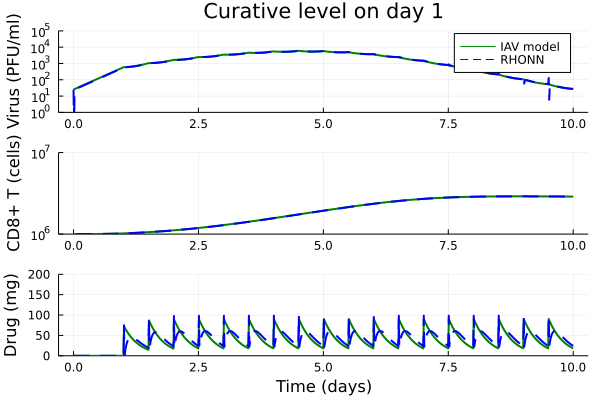

In [4]:
p1 = plot(0:0.01:10, [x[:,"V"], X[:,"V"]], yscale=:log10, yrange=(1.0,1.0e5), xlabel="", ylabel="Virus (PFU/ml)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=["IAV model" "RHONN"])
p2 = plot(0:0.01:10, [x[:,"E"], X[:,"E"]], yscale=:log10, yrange=(1.0e6,1.0e7), xlabel="", ylabel="CD8+ T (cells)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=false)
p3 = plot(0:0.01:10, [x[:,"D"], X[:,"D"]], yrange=(0.0,200.0), xlabel="Time (days)", ylabel="Drug (mg)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=false)
p = plot(p1, p2, p3, layout=(3,1), title=["Curative level on day 1" "" ""] )
#savefig(p, joinpath(plotsdir(), "IAV_curative_day1.png"))

##### Case Study 2: Pandemic level drug administration started on day 2

In [5]:
pandemic_treatment = PresetTimeCallback(2.0:0.5:max(IAV_tspan...), integrator -> integrator.u[3] += 150.0)
sol = solve(IAV_prob, callback=pandemic_treatment)

x = DataFrame(hcat(map(sol, 0.0:0.01:10)...)', ["E", "V", "D"])
u = [k > 100 && (mod(k-1, 50)==0) ? 75.0 : 0.0 for k in 1:1001]

RHONN, params = IAV_model(x, u)
X = train!(RHONN, x, params; algorithm=EKF!());

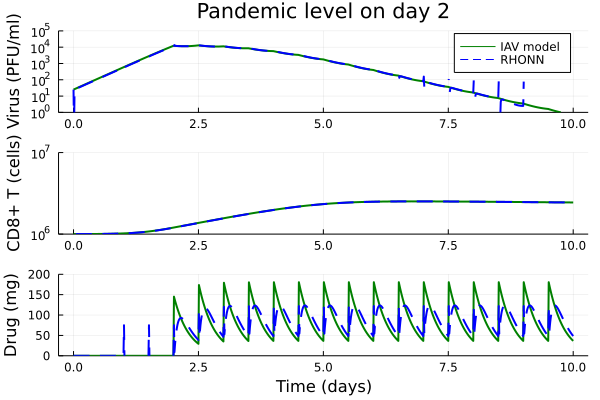

┌ Warning: Invalid negative or zero value -10.962762105606544 found at series index 753 for log10 based yscale
└ @ Plots C:\Users\Daniel I Parra Verde\.julia\packages\Plots\1KWPG\src\utils.jl:95
┌ Warning: Invalid negative or zero value -10.962762105606544 found at series index 753 for log10 based yscale
└ @ Plots C:\Users\Daniel I Parra Verde\.julia\packages\Plots\1KWPG\src\utils.jl:95
┌ Warning: Invalid negative or zero value -10.962762105606544 found at series index 753 for log10 based yscale
└ @ Plots C:\Users\Daniel I Parra Verde\.julia\packages\Plots\1KWPG\src\utils.jl:95


In [6]:
p1 = plot(0:0.01:10, [x[:,"V"], X[:,"V"]], yscale=:log10, yrange=(1.0,1.0e5), xlabel="", ylabel="Virus (PFU/ml)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=["IAV model" "RHONN"])
p2 = plot(0:0.01:10, [x[:,"E"], X[:,"E"]], yscale=:log10, yrange=(1.0e6,1.0e7), xlabel="", ylabel="CD8+ T (cells)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=false)
p3 = plot(0:0.01:10, [x[:,"D"], X[:,"D"]], yrange=(0.0,200.0), xlabel="Time (days)", ylabel="Drug (mg)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=false)
p = plot(p1, p2, p3, layout=(3,1), title=["Pandemic level on day 2" "" ""] )
#savefig(p, joinpath(plotsdir(), "IAV_pandemic_day2.png"))
p

##### Case Study 1: Curative level drug administration started on day 3

In [7]:
curative_treatment_day_3 = PresetTimeCallback(3.0:0.5:max(IAV_tspan...), integrator -> integrator.u[3] += 75.0)
sol = solve(IAV_prob, callback=curative_treatment_day_3)

x = DataFrame(hcat(map(sol, 0.0:0.01:10)...)', ["E", "V", "D"])
u = [k > 100 && (mod(k-1, 50)==0) ? 75.0 : 0.0 for k in 1:1001]

RHONN, params = IAV_model(x, u)
X = train!(RHONN, x, params; algorithm=EKF!());

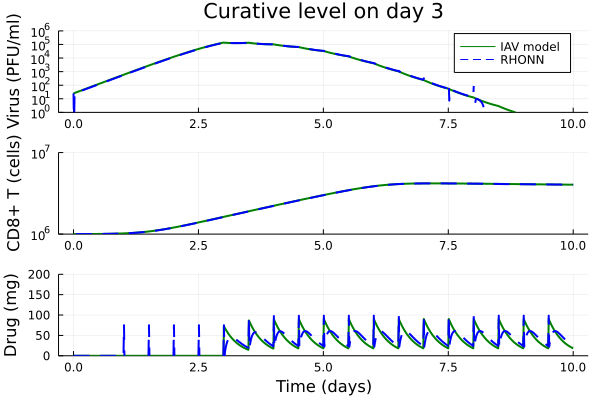

┌ Warning: Invalid negative or zero value -34.62675713327917 found at series index 803 for log10 based yscale
└ @ Plots C:\Users\Daniel I Parra Verde\.julia\packages\Plots\1KWPG\src\utils.jl:95
┌ Warning: Invalid negative or zero value -34.62675713327917 found at series index 803 for log10 based yscale
└ @ Plots C:\Users\Daniel I Parra Verde\.julia\packages\Plots\1KWPG\src\utils.jl:95
┌ Warning: Invalid negative or zero value -34.62675713327917 found at series index 803 for log10 based yscale
└ @ Plots C:\Users\Daniel I Parra Verde\.julia\packages\Plots\1KWPG\src\utils.jl:95


In [8]:
p1 = plot(0:0.01:10, [x[:,"V"], X[:,"V"]], yscale=:log10, yrange=(1.0,1.0e6), xlabel="", ylabel="Virus (PFU/ml)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=["IAV model" "RHONN"])
p2 = plot(0:0.01:10, [x[:,"E"], X[:,"E"]], yscale=:log10, yrange=(1.0e6,1.0e7), xlabel="", ylabel="CD8+ T (cells)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=false)
p3 = plot(0:0.01:10, [x[:,"D"], X[:,"D"]], yrange=(0.0,200.0), xlabel="Time (days)", ylabel="Drug (mg)", lw=[2 2], c=[:green :blue], ls=[:solid :dash], label=false)
p = plot(p1, p2, p3, layout=(3,1), title=["Curative level on day 3" "" ""] )
#savefig(p, joinpath(plotsdir(), "IAV_curative_day3.png"))
p